This Jupyter notebook is also available on <https://github.com/atomisticnet/ml-catalysis>. If you make use of the notebook or the enclosed data, please cite:

[1] S. R. Denny, Z. Lin, W. N. Porter, N. Artrith, J. G. Chen, *in revision*.<br/>
[2] N. Artrith, Z. Lin, J.G. Chen, *ACS Catalysis* **10**, 2020, 9438–9444.<br/>
[3] H. Li, E.J. Evans, C. B. Mullins, G. Henkelman, *J. Phys. Chem. C* **122**, 2018, 22024–22032.

Contact information: Nongnuch Artrith (<n.artrith@uu.nl>).

### Estimation of transition-state energies

A Brønsted-Evans-Polanyi (BEP) model is used to estimate the transition-state energies ($E_{\mathrm{TS}}$) for reactions over Pt/Mo<sub>2</sub>N(111).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Reference data for reaction steps within the reaction network of the ethanol reforming reaction is loaded.  The data was compiled from references [2] and [3].

In [2]:
data = pd.read_csv("database-dft.csv")
data

,Surface,Reaction,Initial,Final,Er,Ea,E_TS
0,Pt(111),*CH3CH2O → *CH3 + *CH2O,0.5771,0.3991,-0.1780,2.2138,2.7909
1,Pt(111),*CH3CHO → *CH3 + *CHO,0.6068,0.5283,-0.0784,1.3971,2.0038
2,Pt(111),*CH2CH2O → *CH2 + *CH2O,0.9086,1.0147,0.1061,1.6521,2.5607
3,Pt(111),*CH3CO → *CH3 + *CO,0.2367,-0.0195,-0.2562,1.7873,2.0240
4,Pt(111),*CH2CHO → *CH2 + *CHO,0.9065,0.8928,-0.0137,1.3868,2.2932
...,...,...,...,...,...,...,...
96,Pd(111),*CH2CHO → *CH2 + *CHO,1.4300,2.0500,0.6200,1.6300,3.0600
97,Pd(111),*CHCH2O → *CHCH2 + *O,2.1800,2.1800,0.0000,1.0600,3.2400
98,Pd(111),*CHCH2O → *CH + *CH2O,2.1900,1.8400,-0.3500,0.9200,3.1100
99,Pd(111),*CH2CO → *CH2C + *O,1.5800,2.3700,0.7900,1.7700,3.3500


Fit of the BEP model to the reference data.

In [3]:
Er = data['Er'].values
Ea = data['Ea'].values
c0, c1 = np.polyfit(Er, Ea, 1)

Visualization of the correlation of predicted transition-state energies compared to the reference energies.

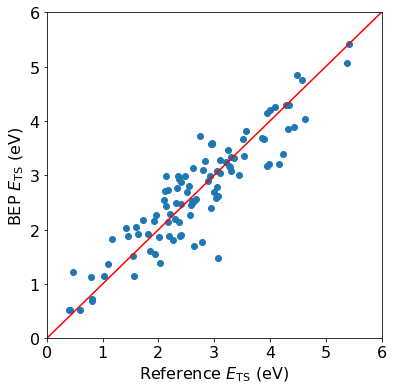

In [4]:
line = np.poly1d([c0, c1])
E_TS_predict = line(data['Er'].values) + data['Initial'].values
fig, ax = plt.subplots(figsize=(6,6))
ax.tick_params(labelsize=16)
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
ax.set_xlabel("Reference $E_{\mathrm{TS}}$ (eV)", fontsize=16)
ax.set_ylabel("BEP $E_{\mathrm{TS}}$ (eV)", fontsize=16)
ax.scatter(data['E_TS'].values, E_TS_predict)
ax.plot([0, 6], [0, 6], c='r')
plt.show()

Prediction of the transition-state energies for the four reactions over Pt/Mo<sub>2</sub>N(111) that are discussed in the main manuscript.  All energies are in eV.

In [5]:
df = pd.DataFrame(
    columns=['Reaction', 'Initial', 'Final'],
    data=[
        ['I', 0.4797, 1.0981],
        ['II', 0.0730, 0.8849],
        ['III',  1.2030, 1.3648],
        ['IV', 0.4587, 0.3731]
    ]
)

df['Er'] = df['Final'] - df['Initial']
df['Ea'] = c0 + c1*df['Er']
df['E_TS'] = df['Initial'] + df['Ea']

df.round(2)

,Reaction,Initial,Final,Er,Ea,E_TS
0,I,0.48,1.10,0.62,1.36,1.84
1,II,0.07,0.88,0.81,1.61,1.69
2,III,1.20,1.36,0.16,0.77,1.97
3,IV,0.46,0.37,-0.09,0.45,0.91
